<a href="https://colab.research.google.com/github/regina-fonseca-avila/data_science/blob/main/time_series/Seasonal_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sesonal plot

Estudo feito com base na sessão [2.4 Seasonal Plots](https://otexts.com/fpp3/seasonal-plots.html) do livro Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3. Accessed on 2023-11-22.

Um gráfico sazonal permite entender os padrões de sazonalidade de forma mais clara. No sessão são mostrados vários exemplos além de existir o link para um video em que são explicados os padrões de forma ainda mais clara.

O objetivo aqui reproduzir o tipo de gráfico mostrado utilizando python, matplotlib e seaborn. Para isso utilizamos a série [Steel Industry Energy Consumption]( http://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption) V E,Sathishkumar, Shin,Changsun, and Cho,Yongyun. (2023). Steel Industry Energy Consumption. UCI Machine Learning Repository. https://doi.org/10.24432/C52G8C.

# 1 Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Dados

In [ ]:
!wget http://archive.ics.uci.edu/static/public/851/steel+industry+energy+consumption.zip-

--2023-11-22 18:01:44--  http://archive.ics.uci.edu/static/public/851/steel+industry+energy+consumption.zip-
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-11-22 18:01:44 ERROR 404: Not Found.



In [ ]:
!unzip steel+industry+energy+consumption.zip

Archive:  steel+industry+energy+consumption.zip
replace Steel_industry_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
# leitura dos dados e primeiras linhas
df = pd.read_csv('Steel_industry_data.csv')
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [ ]:
# tipos dos dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

Vamos verificar os padrões da coluna Usage_kWh.

## 2.1 Novas colunas

Para construir os gráficos sazonais é necessário termos a coluna date, ou seja a coluna que tem a informação de data e horário, com o tipo datetime. Vamos chama-la de datetime e a partir desta coluna extraímos várias informações.

In [ ]:
df['datetime'] = pd.to_datetime(df['date'])
df['datetime_date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['time'] = df['hour'] + df['minute'] / 60 # hora em um dia em float
df['dayofyear'] = df['datetime'].dt.dayofyear
df['weektime'] = df['datetime'].dt.weekday + df['time']/24  # dia em uma semana em float
df['week'] = df['datetime'].dt.isocalendar().week
df['week'] = df['week'].astype(str)
df['day_time'] = df['day'] + df['time']/24 - 1 # número de dias em um mes em float (primerio dia vai de 0 a 1)
df['month_str'] = df['month'].astype(str)

# 3 Gráficos

## 3.1 Consumo de energia ano 2018

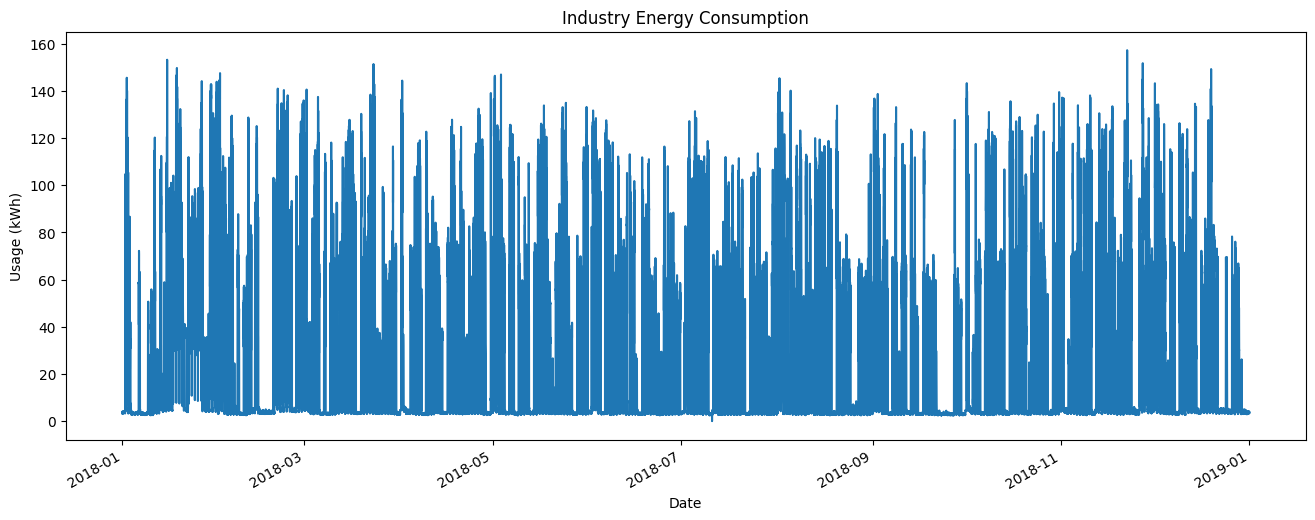

In [ ]:
df.plot(x='datetime',
        y='Usage_kWh',
        legend=False,
        figsize=(16,6));

plt.xlabel('Date');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption');

- a séria não parece ter tendência
- vemos picos maiores e menores
- em Fevereiro e Outubro temos intervalos com valores próximos a zero

## 2.2 Gráfico sazonal: diário

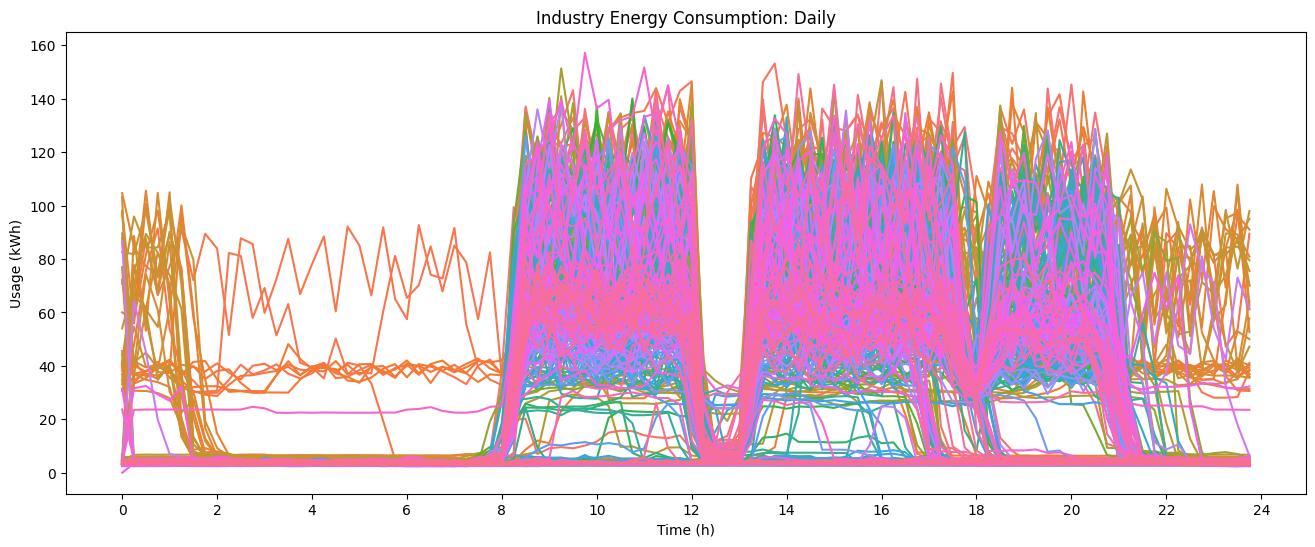

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,
x='time',
y='Usage_kWh',
hue='datetime_date',
legend=False
)
plt.xticks(np.arange(0,25,2));
plt.xlabel('Time (h)');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Daily');

- temos as mesmas informações do gráfico anterior, mas agora plotadas por dia. Temos um gráfico para cada dia do ano
- agora é possível ver que temos uma padrão ao longo do dia. Para a maioria dos dias o consumo aumenta as 8 horas e fica alto até meio dia. Volta a aumentar em torno de 13 horas e fica alto até próximo das 18 horas tem uma queda volta a subir rapidamente e fica alto até próximo das 21:30 horas.
- entre 0 e 8 horas e 22 e 24 horas o consumo é próximo a zero na maior parte dos dias, mas existe um padrão diferente entre 22 horas e 2 horas que parece ter mais dias com valores entre 20 e 90 kwh.

`### 2.2.1 Média do consumo ao longo do dia`

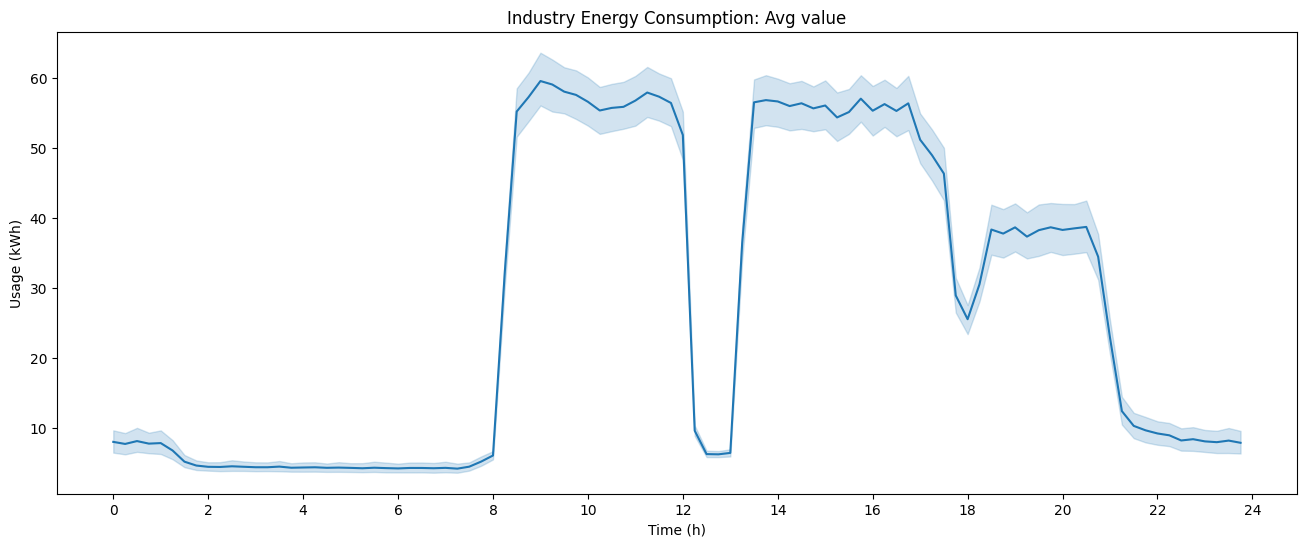

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,
x='time',
y='Usage_kWh',
legend=False
)
plt.xticks(np.arange(0,25,2));
plt.xlabel('Time (h)');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Avg value');

- a linha mostra o valor médio do consumo em um determinado horário, por exemplo, quando time = 14.25, temos a média de consumo as 14 horas e 15 minutos de todos os dias dos ano de 2018.
- desta forma é mais fácil ver o padrão que já descrevemos no tópico acima.

## 2.3 Gráfico sazonal: semanal

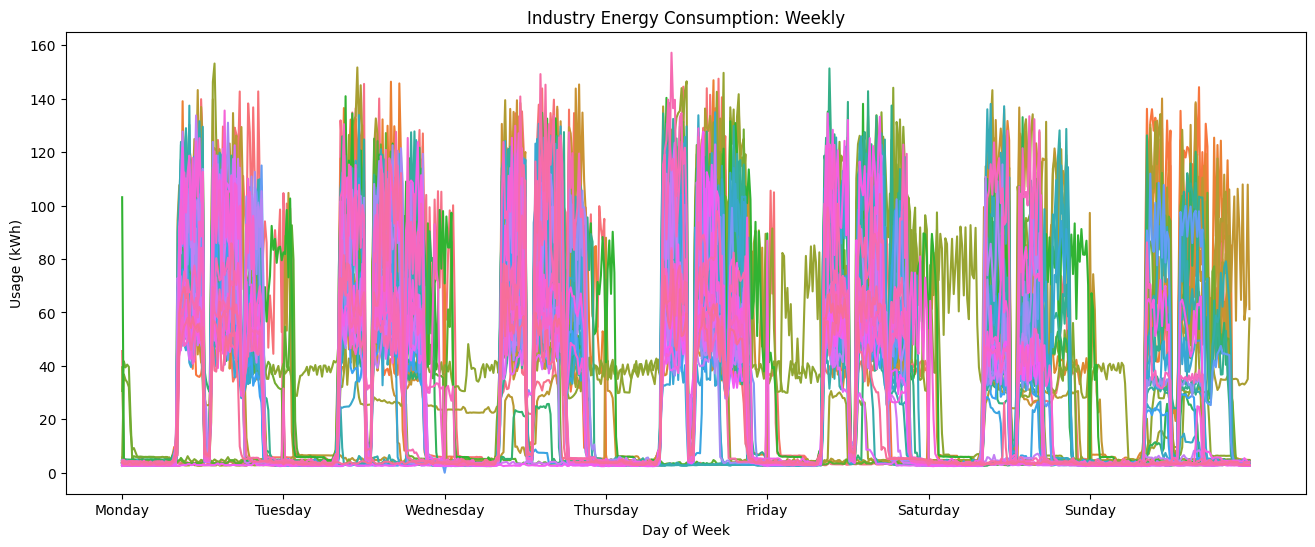

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,
x='weektime',
y='Usage_kWh',
estimator=None,
hue='week',
legend=False,
)

# chat gpt
import calendar
# Get the days of the week as a list
days_of_week = list(calendar.day_name)

plt.xticks(np.arange(0,7),days_of_week);
plt.xlabel('Day of Week');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Weekly');

- o mesmo padrão se repete em todos os dias das semana, inclusive nos finais de semana

### 2.3.1 Média do consumo ao longo da semana



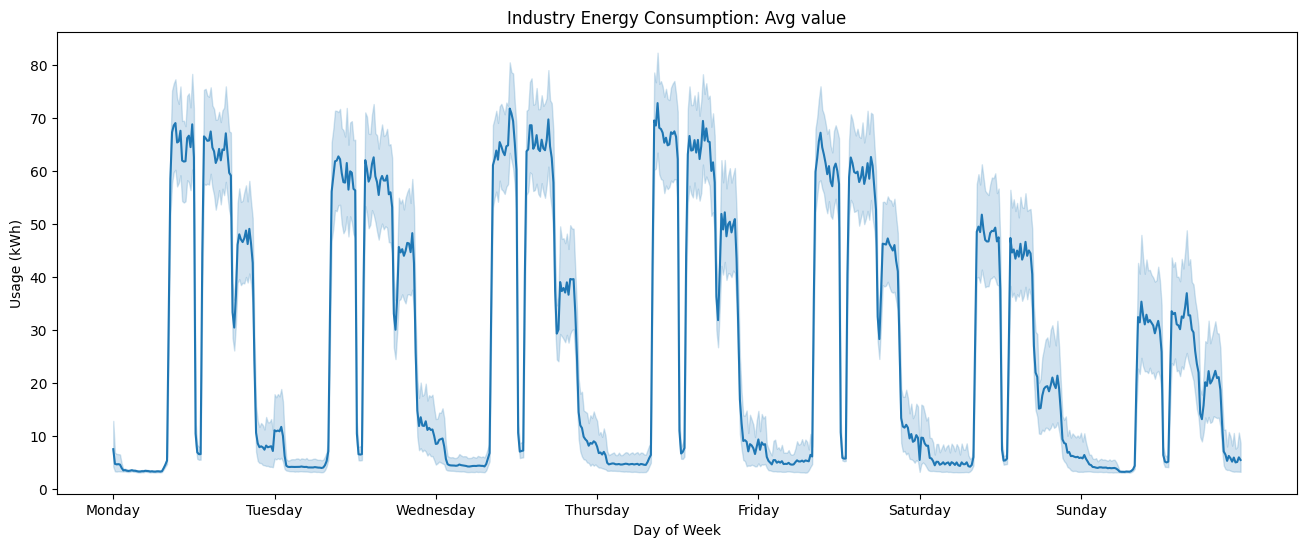

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,
x='weektime',
y='Usage_kWh',
legend=False
)
plt.xticks(np.arange(0,7),days_of_week);
plt.xlabel('Day of Week');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Avg value');

- o gráfico acima é muito interessante, podemos ver que embora o padrão de consumo de energia se repita ao longo da semana, o consumo médio é menor nos finais de semana
- considerando os dois gráficos acima, é importante nos aprofundarmos mais no consumo do fim de semana. Existe nos dados a coluna *WeekStatus* que traz a informação Weekday ou Weekend.

### 2.3.2 Gráfico sazonal: semanal - weekday

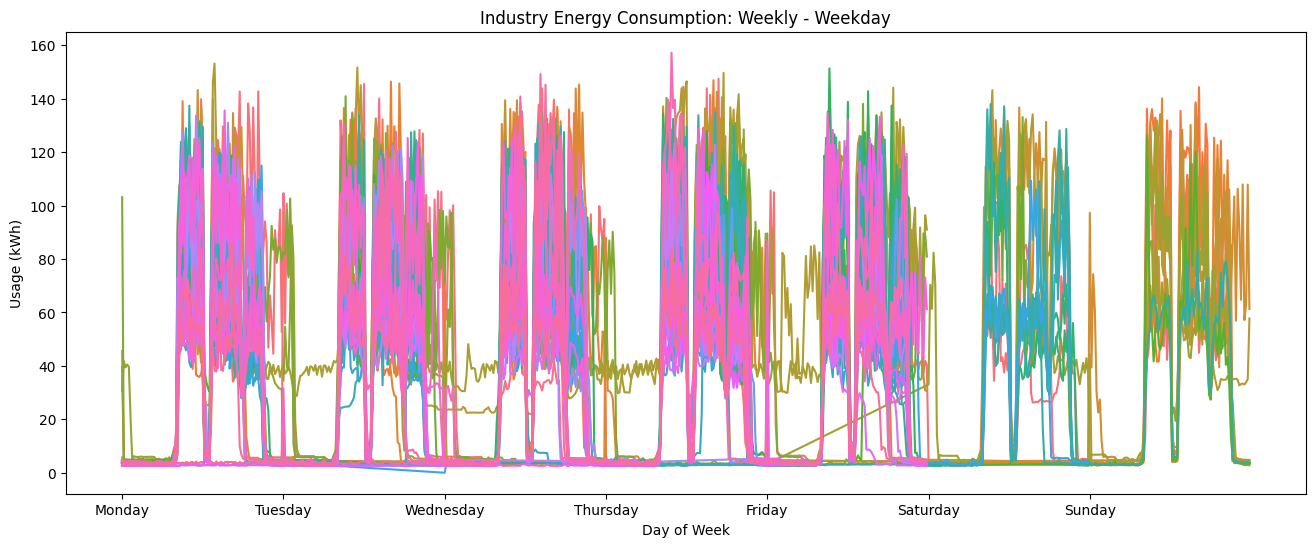

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df[df['WeekStatus'] == 'Weekday'],
x='weektime',
y='Usage_kWh',
estimator=None,
hue='week',
legend=False
)
plt.xticks(np.arange(0,7),days_of_week);
plt.xlabel('Day of Week');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Weekly - Weekday');

- No domingo não vemos a faixa com valores próximos a zero.

### 2.3.3 Média do consumo ao longo da semana - weekday

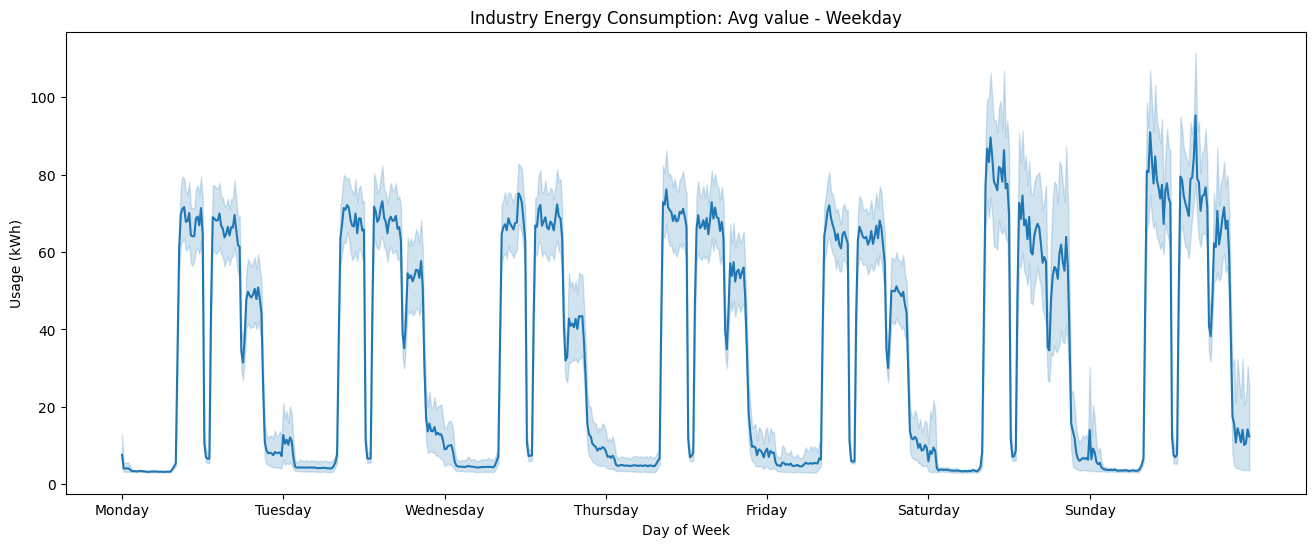

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df[df['WeekStatus'] == 'Weekday'],
x='weektime',
y='Usage_kWh',
legend=False
)
plt.xticks(np.arange(0,7),days_of_week);
plt.xlabel('Day of Week');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Avg value - Weekday');

- quando o WeekStatus é Weekday a média do consumo no Sábado e no domingo não cai, é na verdade mais alta que de Segunda a Sexta.

### 2.3.4 Gráfico sazonal: semanal - weekend

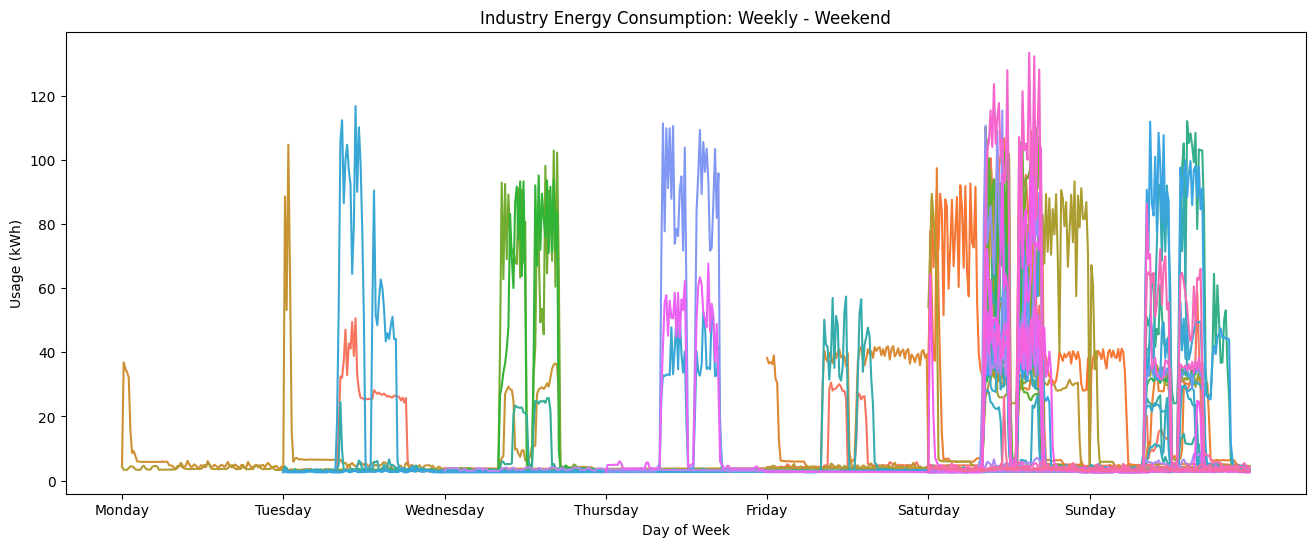

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df[df['WeekStatus'] == 'Weekend'],
x='weektime',
y='Usage_kWh',
estimator=None,
hue='week',
legend=False
)
plt.xticks(np.arange(0,7),days_of_week);
plt.xlabel('Day of Week');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Weekly - Weekend');

### 2.3.5 Média do consumo ao longo da semana - weekend

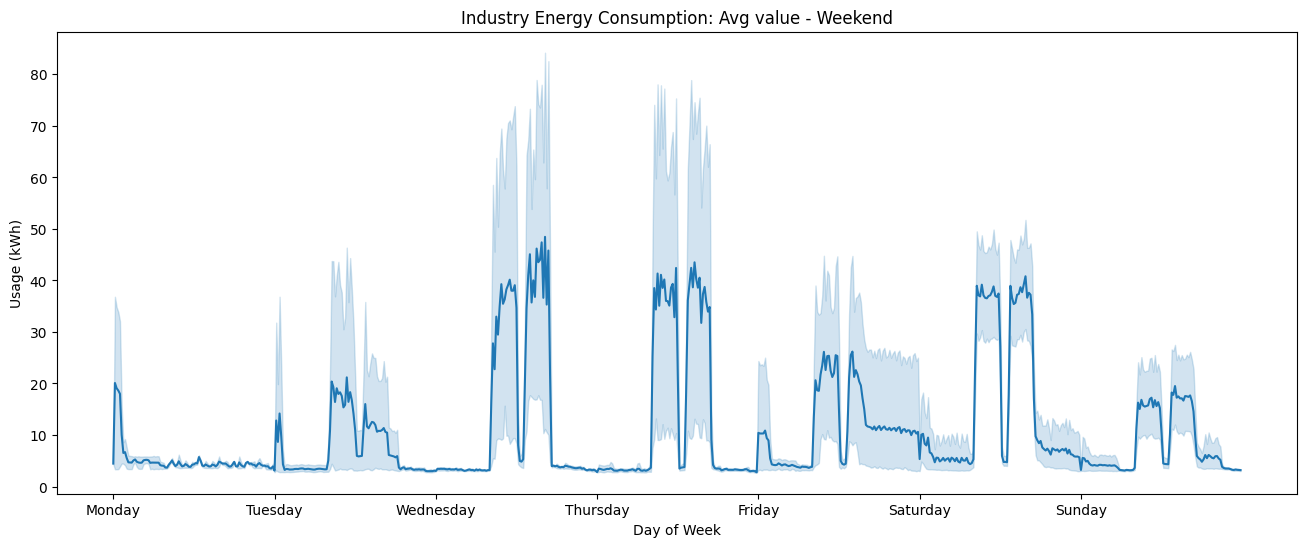

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df[df['WeekStatus'] == 'Weekend'],
x='weektime',
y='Usage_kWh',
legend=False
)
plt.xticks(np.arange(0,7),days_of_week);
plt.xlabel('Day of Week');
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Avg value - Weekend');

- para dias marcados com Weekend a média de consumo é menor ficando em torno dos 40 enquanto para dias marcados com Weekday a média é próxima a 80.
- Na quarta e na quinta-feira o valor do desvio padrão (área sombreada) é bem maior do que em outros dias. Também é interessante notar que aqui não vemos os três intervalos de consumu mais alto ao longo do dia.

## 2.4 Gráfico sazonal: mensal

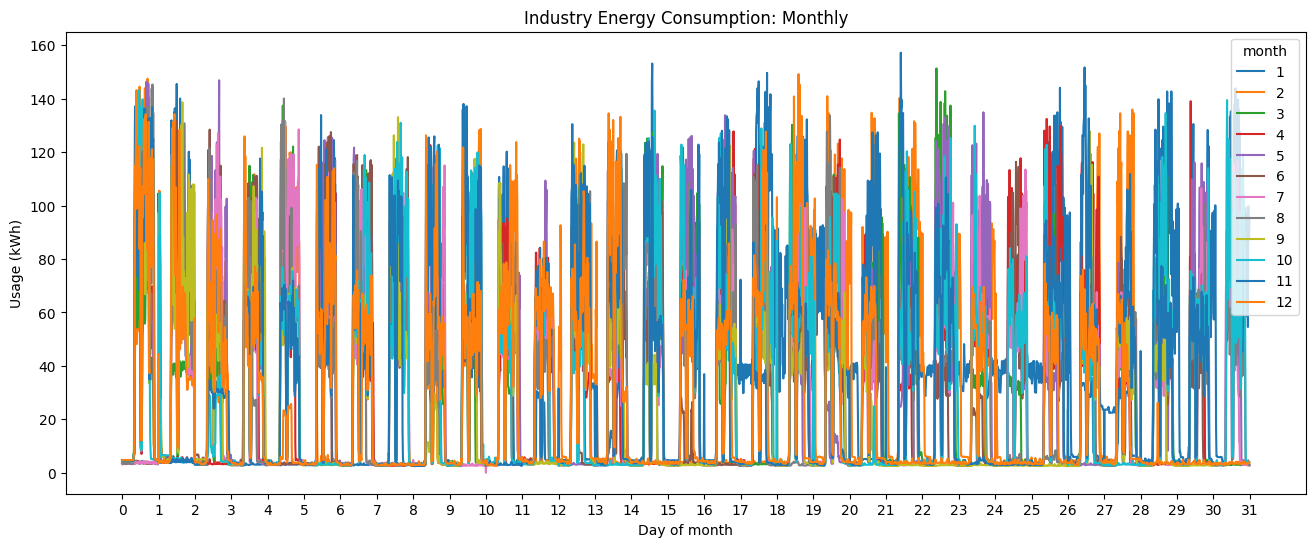

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df,
x='day_time',
y='Usage_kWh',
estimator=None,
hue='month',
palette='tab10'
)
plt.xticks(np.arange(0,32));
plt.xlabel('Day of month')
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption: Monthly');


- não é possível perceber variação ao longo do mês nem ao longo dos meses, com exceção do dia 11 em que temos picos mais baixos

- vamos visualizar os dados de outra forma, colocando cada mês em um gráfico

In [ ]:
df2 = df.copy()
df2 = df[['day_time','Usage_kWh','month']]

In [ ]:
!pip install matplotlib

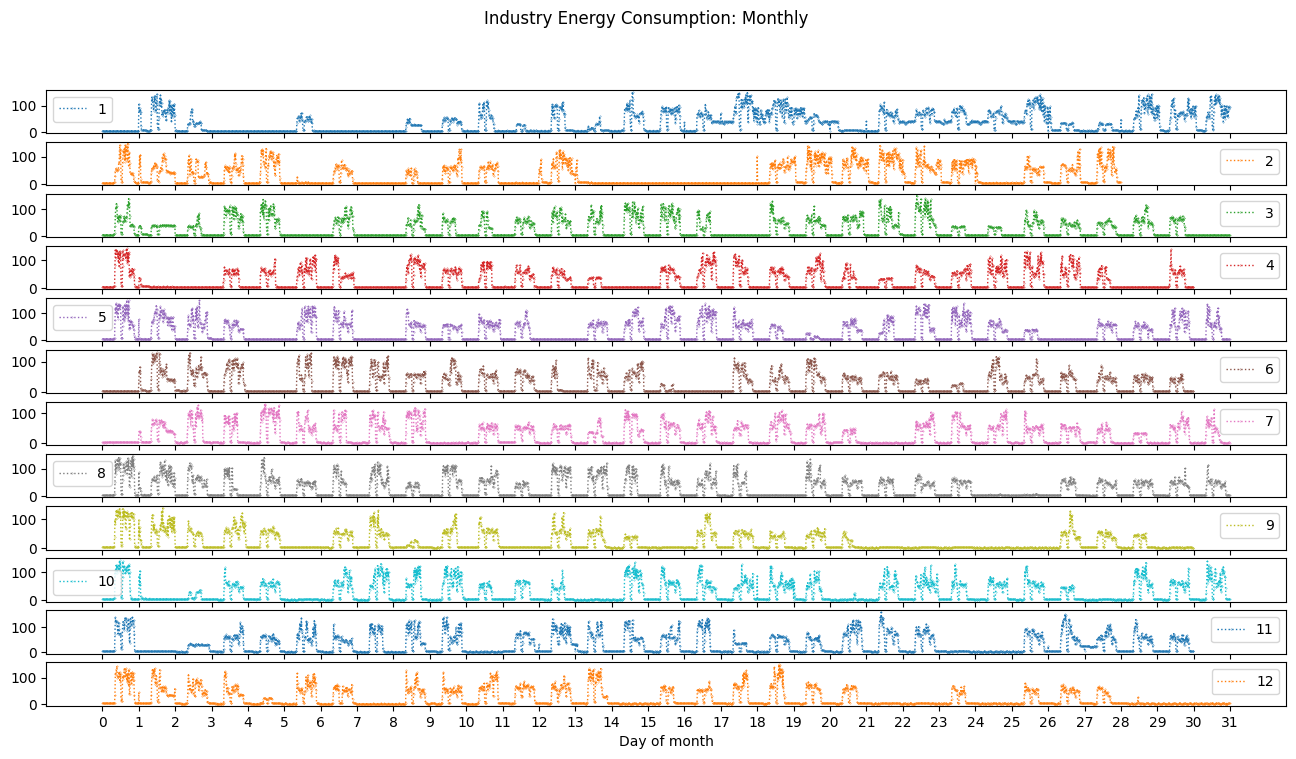

In [ ]:
df2.pivot(index='day_time', columns='month', values='Usage_kWh').plot(
subplots=True,
figsize=(16,8),
marker='.',
markersize=0.5,
linewidth=1,
linestyle=':');

plt.xticks(np.arange(0,32));
plt.xlabel('Day of month')
plt.suptitle('Industry Energy Consumption: Monthly');

- podemos ver que o padão diário se repete várias vezes mas temos dias com consumo próximo de zero.
- não temos tendência
- não é possível ver se existe um padrão anual pois temos apenas dados de um ano

## 2.5 Consumo durante 2018: Weekday e Weekend

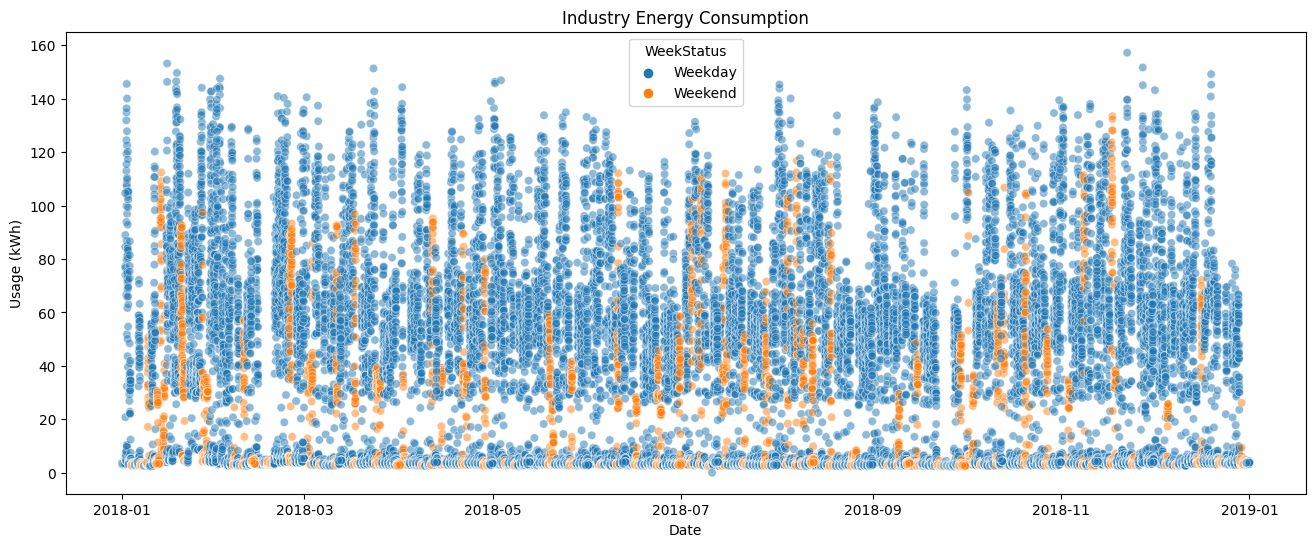

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df,
            x='datetime',
            y='Usage_kWh',
            hue='WeekStatus',
            alpha=0.5,
            )

plt.xlabel('Date')
plt.ylabel('Usage (kWh)');
plt.title('Industry Energy Consumption');

- em geral os pontos laranja que são Weekend tem valores máximos menores que os pontos azuis
- numa análise como está em que fosse possível ter acesso a quem gerou os dados seria interessante entender melhor como é feita está marcação

# 3 Conclusão

**Série Consumo**

- Temos uma série que não tem tendência, apresenta um padrão diário bem característico com três intervalos de consumo mais alto. É importante utilizar a marcação de WeekStatus.

- Para melhorar a análise também podemos verificar as demais informações trazidas no dataset.

- Um próximo passo seria fazer previões para o consumo.

**Gráficos sazonais**

- Com os gráficos sazonais é possível analisar padrões de sazonalidade que são difíces de verificar diretamente na série.

- É possível analisar séries que tem mais de uma padrâo de sazonalidade

- São fáceis de fazer principalmente no R utilizando a biblioteca citada no livro que baseou este estudo.